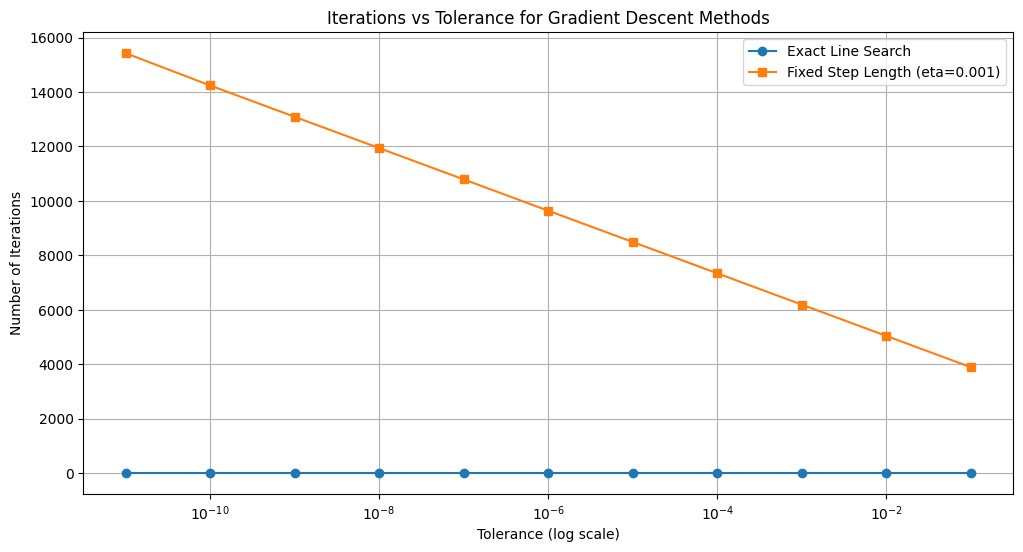

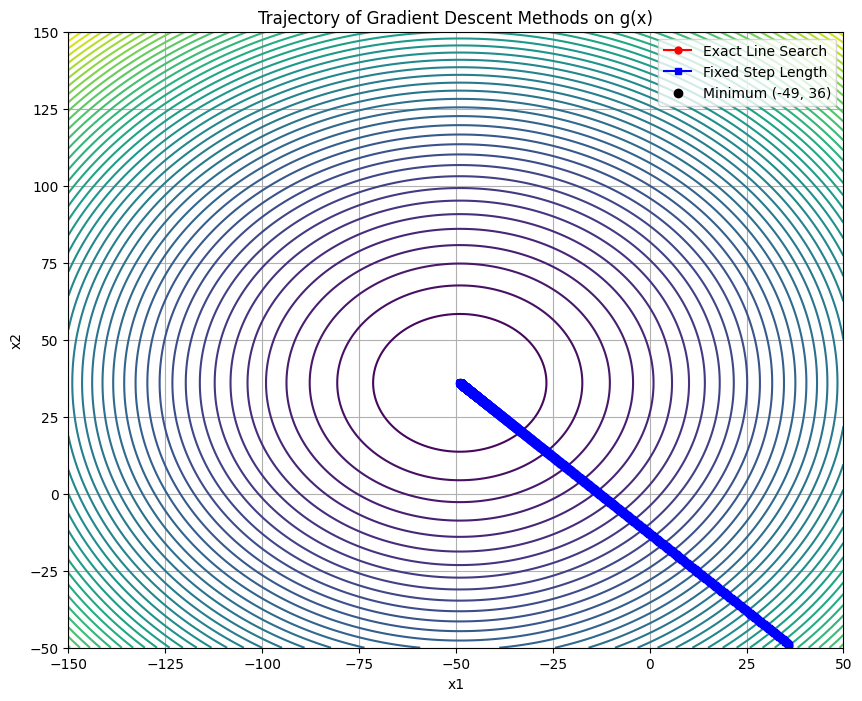

Fixed Step-Length Trajectory: [[ 36.         -49.        ]
 [ 35.83       -48.83      ]
 [ 35.66034    -48.66034   ]
 ...
 [-48.99999646  35.99999646]
 [-48.99999646  35.99999646]
 [-48.99999647  35.99999647]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(x), its gradient, and Hessian
def g(x):
    return (x[0] + 49)**2 + (x[1] - 36)**2

def grad_g(x):
    return 2 * np.array([x[0] + 49, x[1] - 36])

def exact_line_search(x, grad):
    """Compute the step size using exact line search for g(x)."""
    alpha = np.dot(grad, grad) / (2 * np.dot(grad, grad))
    return alpha

# Gradient Descent with Exact Line Search
def gradient_descent_exact(x0, tol):
    x = x0
    iterations = 0
    trajectory = [x]

    while np.linalg.norm(grad_g(x)) > tol:
        grad = grad_g(x)
        alpha = exact_line_search(x, grad)
        x = x - alpha * grad
        trajectory.append(x)
        iterations += 1

    return x, iterations, trajectory

# Gradient Descent with Fixed Step Length
def gradient_descent_fixed(x0, tol, eta):
    x = x0
    iterations = 0
    trajectory = [x]

    while np.linalg.norm(grad_g(x)) > tol:
        grad = grad_g(x)
        x = x - eta * grad
        trajectory.append(x)
        iterations += 1

    return x, iterations, trajectory

# Initial point and tolerances
x0 = np.array([36, -49])
tolerances = [10**-p for p in range(1, 12)]

# Run both algorithms and record iterations
exact_iters = []
fixed_iters = []
eta = 0.001

for tol in tolerances:
    _, iters, _ = gradient_descent_exact(x0, tol)
    exact_iters.append(iters)

    _, iters, _ = gradient_descent_fixed(x0, tol, eta)
    fixed_iters.append(iters)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(tolerances, exact_iters, label="Exact Line Search", marker='o')
plt.plot(tolerances, fixed_iters, label="Fixed Step Length (eta=0.001)", marker='s')
plt.xscale('log')
plt.xlabel("Tolerance (log scale)")
plt.ylabel("Number of Iterations")
plt.title("Iterations vs Tolerance for Gradient Descent Methods")
plt.legend()
plt.grid()
plt.show()

# Generate trajectory plots
_, _, exact_trajectory = gradient_descent_exact(x0, 1e-5)
_, _, fixed_trajectory = gradient_descent_fixed(x0, 1e-5, eta)


# Contour Plot for g(x)
x = np.linspace(-150, 50, 400)
y = np.linspace(-50, 150, 400)
X, Y = np.meshgrid(x, y)
Z = (X + 49)**2 + (Y - 36)**2

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=50, cmap="viridis")

# Plot Trajectories
exact_trajectory = np.array(exact_trajectory)
fixed_trajectory = np.array(fixed_trajectory)

# Exact Line Search Trajectory
plt.plot(
    exact_trajectory[:, 0], exact_trajectory[:, 1],
    'o-', label="Exact Line Search", color="red", markersize=5
)

# Fixed Step-Length Trajectory
plt.plot(
    fixed_trajectory[:, 0], fixed_trajectory[:, 1],
    's-', label="Fixed Step Length", color="blue", markersize=5
)

# Minimum Point
plt.scatter([-49], [36], color="black", label="Minimum (-49, 36)")

# Titles and Labels
plt.title("Trajectory of Gradient Descent Methods on g(x)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()
print("Fixed Step-Length Trajectory:", fixed_trajectory)
